---
date: 2023-03-21
title: Haldane - Haldane model
date-format: short
---

In [2]:
import kwant
from matplotlib import pyplot as plt
import tinyarray as ta
import numpy as np
import scipy.sparse.linalg as sla
import scipy


import scipy as scp


from kwant.physics import dispersion
from numpy.linalg import eig

In [3]:
def make_system_noleads(a=1, t_1=1.0, t_2=1.0, L=10, r=3):
    def circle(pos):
        (x, y) = pos
        rsq = x ** 2 + y ** 2
        return rsq < r ** 2
       

    
  
    R = np.array([[np.sqrt(3)/2, 1/2],[-1/2, np.sqrt(3)/2]])

    v_1 = [3*a/2, np.sqrt(3)*a/2]
    v_2 = [3*a/2, -np.sqrt(3)*a/2]
    
    r_1 = [0,0]
    r_2 = [a,0]
    
    lat = kwant.lattice.Polyatomic([np.dot(R,v_1), np.dot(R,v_2)], [np.dot(R,r_1), np.dot(R,r_2)],norbs=1)

    lat.a, lat.b = lat.sublattices
    
    syst = kwant.Builder()
    onsite = 0
    # Onsites
    syst[(lat.a(n, m) for n in range(L) for m in range(L))] = onsite
    syst[(lat.b(n, m) for n in range(L) for m in range(L))] = onsite
    # Hopping
    hoppings = (((0, a), lat.a, lat.b), 
                ((a, 0), lat.a, lat.b), 
                ((-a/2, -np.sqrt(3)*a/2), lat.a, lat.b),
                ((-a/2, np.sqrt(3)*a/2), lat.a, lat.b))
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = t_1
    hoppings2_a = (((0, a), lat.a, lat.a), ((a, 0), lat.a, lat.a), ((a, -a), lat.a, lat.a))
    #hoppings2_a = (((a/2, 3*a/2), lat.a, lat.a))
    hoppings2_b = (((0, a), lat.b, lat.b), ((a, 0), lat.b, lat.b), ((a, -a), lat.b, lat.b))
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2_a]] = t_2
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2_b]] = t_2

    
    return syst.finalized()

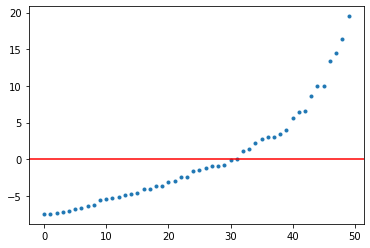

In [12]:
from ipywidgets import *

def SSH_energy(v,w,c):
  syst = make_system_noleads(a=1, t_1=v, t_2=w*np.exp(1j*c), L=5, r=3)
  hamiltonian = syst.hamiltonian_submatrix(sparse=False)
  w1,v1=eig(hamiltonian)
  plt.plot(np.arange(0,50,1),sorted(np.real(w1)),'.')
  plt.axhline(y = 0, color = 'r', linestyle = '-')
  plt.show()

#interact(SSH_energy,v=(0.0,5,0.1),w=(0.0,5,0.1),c=(-np.pi,np.pi,0.1));
SSH_energy(2.5, 2.5, 0)

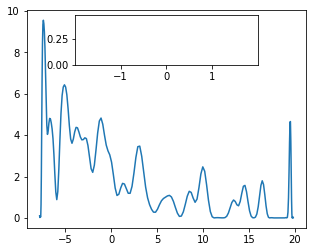

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

def x(v,w,c):
    fig, ax = plt.subplots(figsize=[5, 4])
    syst = make_system_noleads(a=1, t_1=v, t_2=w*np.exp(1j*c), L=5, r=3)
    hamiltonian = syst.hamiltonian_submatrix(sparse=False)

    w1,v1=eig(hamiltonian)
    rho = kwant.kpm.SpectralDensity(hamiltonian, rng=0)
    w1, densities = rho()
    density_subset = np.real(rho(w1))
    ax.plot(w1,density_subset)

    # generate inset axes
    axins = zoomed_inset_axes(ax, 5, loc='upper center')  # zoom = 5

    # plot in the inset axes
    axins.scatter(w1,density_subset, s=2)

    # fix the x, y limit of the inset axes
    axins.set_xlim(-max(w1)/10, max(w1)/10)
    axins.set_ylim(0, max(density_subset)/20)

    # fix the number of ticks on the inset axes
    axins.yaxis.get_major_locator().set_params(nbins=1)
    axins.xaxis.get_major_locator().set_params(nbins=1)

#interact(plot_DOS3,v=(0.0,5,0.1),w=(0.0,5,0.1),c=(-np.pi,np.pi,0.1))
plot_DOS3(2.5, 2.5, 0)

In [14]:
def make_system(a=1, t_1=1.0, t_2=1.0, L=10, r=3):
    def circle(pos):
        (x, y) = pos
        rsq = x ** 2 + y ** 2
        return rsq < r ** 2
        #return x>=-L//2 and x<<L//2 and y<=L//2 and y>=-L//2

    
    #lat = kwant.lattice.Polyatomic([[3*a/2, np.sqrt(3)*a/2], [3*a/2, -np.sqrt(3)*a/2]], [[0, 0], [a,0]])
    R = np.array([[np.sqrt(3)/2, 1/2],[-1/2, np.sqrt(3)/2]])

    v_1 = [3*a/2, np.sqrt(3)*a/2]
    v_2 = [3*a/2, -np.sqrt(3)*a/2]
    
    r_1 = [0,0]
    r_2 = [a,0]
    
    lat = kwant.lattice.Polyatomic([np.dot(R,v_1), np.dot(R,v_2)], [np.dot(R,r_1), np.dot(R,r_2)],norbs=1)

    lat.a, lat.b = lat.sublattices
    
    syst = kwant.Builder()
    onsite = 0
    # Onsites
    syst[(lat.a(n, m) for n in range(L) for m in range(L))] = onsite
    syst[(lat.b(n, m) for n in range(L) for m in range(L))] = onsite
    # Hopping
    hoppings = (((0, a), lat.a, lat.b), 
                ((a, 0), lat.a, lat.b), 
                ((-a/2, -np.sqrt(3)*a/2), lat.a, lat.b),
                ((-a/2, np.sqrt(3)*a/2), lat.a, lat.b))
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = t_1
    hoppings2_a = (((0, a), lat.a, lat.a), ((a, 0), lat.a, lat.a), ((a, -a), lat.a, lat.a))
    #hoppings2_a = (((a/2, 3*a/2), lat.a, lat.a))
    hoppings2_b = (((0, a), lat.b, lat.b), ((a, 0), lat.b, lat.b), ((a, -a), lat.b, lat.b))
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2_a]] = t_2
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2_b]] = t_2

    
    LEADS = True
    if LEADS:
        # Right lead
        sym_right_lead = kwant.TranslationalSymmetry(np.dot(R,[-3*a/2, -np.sqrt(3)*a/2]))
        #sym_right_lead = kwant.TranslationalSymmetry([2*a,0])
        right_lead = kwant.Builder(sym_right_lead)
        right_lead[(lat.a(n, m) for n in range(L) for m in range(L))] = onsite
        right_lead[(lat.b(n, m) for n in range(L) for m in range(L))] = onsite
        
        # Hopping
        right_lead[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = t_1
        right_lead[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2_a]] = t_2
        right_lead[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2_b]] = t_2
        
        syst.attach_lead(right_lead)
        right_lead_fin = right_lead.finalized()
        
        syst.attach_lead(right_lead.reversed())
    syst_fin = syst.finalized()
    
    if(LEADS):
        return syst_fin, right_lead_fin
    else:
        return syst_fin

def plot_bandstructure(flead, momenta, label=None, title=None):
    bands = kwant.physics.Bands(flead)
    energies = [bands(k) for k in momenta]
    
    plt.figure()
    plt.title(title)
    plt.plot(momenta, energies, label=label)
    plt.xlabel("momentum [(lattice constant)^-1]")
    plt.ylabel("energy [t]")

def plot_conductance(syst, energies):
    # Compute conductance
    data = []
    for energy in energies:
        smatrix = kwant.smatrix(syst, energy)
        data.append(smatrix.transmission(1, 0))

    plt.figure()
    plt.plot(energies, data)
    plt.xlabel("energy [t]")
    plt.ylabel("conductance [e^2/h]")
    plt.show()

def plot_density(sys,ener, it=-1):
    
    wf = kwant.wave_function(sys, energy=ener)
    
    t=np.shape(wf(0))
    nwf=wf(0)[0]*0
    
    
    for i in range(t[0]//2+1):
        test=wf(0)[i]
        nwf+=test

    psi=abs(nwf)**2
    
    if it==-1:
        title="density"
    elif it>-1:
        title= "density"
        
    title2=title+".pdf"
    
    kwant.plotter.map(sys,psi,method='linear',vmin=0)

    J_0 = kwant.operator.Current(sys)
    c = J_0(nwf)

    kwant.plotter.current(sys, c)

    plt.close()

In [7]:

# sys, right_lead = make_system(t_1 = 1, t_2 = 0.5*np.exp(1j))
# kwant.plot(sys)
# kwant.plot(sys, file='haldane.pdf')

# #plot_conductance(sys, np.linspace(0,2,1000))
# plot_density(sys, 1)

# for phi in np.linspace(2*np.pi/5, 3*np.pi/2, 10):
#     t_2 = 0.1 * np.exp(1j*phi)
#     sys, right_lead = make_system(t_1 = 1, t_2 = t_2)
#     plot_bandstructure(right_lead, np.linspace(-np.pi, np.pi, 100), t_2, title=f"t_1 = 1, t_2 = {t_2}")
#     plt.savefig(f't_1 = 1 t_2 = {round(t_2,4)}.pdf')
# plt.show()


# R = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],[-1/np.sqrt(2), 1/np.sqrt(2)]])
# print(np.dot(R,[1,0]))

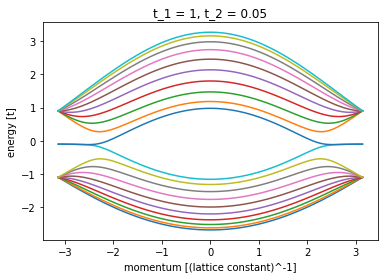

In [15]:
def plot_spectrum(t_1,t_2,c):
    #t_2 = t_2 * np.exp(1j*c)
    sys, right_lead = make_system(t_1 = t_1, t_2 = t_2*np.exp(1j*c))
    plot_bandstructure(right_lead, np.linspace(-np.pi, np.pi, 100), t_2, title=f"t_1 = 1, t_2 = {t_2}")

#interact(plot_spectrum,t_1=(0.0,5,0.1),t_2=(0.0,5,0.1),c=(-np.pi,np.pi,0.1))
plot_spectrum(1, 0.05, 0)

/usr/local/anaconda3/envs/kwant/lib/python3.6/site-packages/ipykernel_launcher.py:109: RuntimeWarning: The plotted data contains 0.87% of values overflowing upper limit 1.3598 


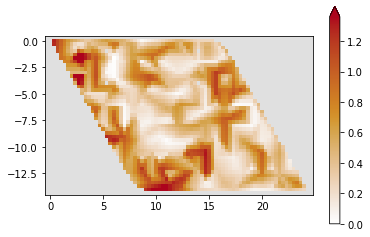

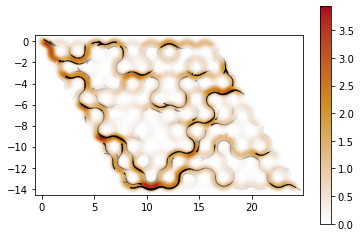

/usr/local/anaconda3/envs/kwant/lib/python3.6/site-packages/ipykernel_launcher.py:114: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [18]:
def plot_conductance(t_1,t_2,c):
    sys, right_lead = make_system(t_1 = t_1, t_2 = t_2*np.exp(1j*c))
    plot_density(sys, 1)

#interact(plot_conductance,t_1=(0.0,5,0.1),t_2=(0.0,5,0.1),c=(-np.pi,np.pi,0.1))
plot_conductance(1, 0.05, 0)

In [21]:
def plot_probability(ham):
    phi_tab = np.linspace(0, 2*np.pi, 10)
    energies = []
    for phi in phi_tab:
        sys = make_system(t_1 = 1, t_2 = np.exp(1j*phi))
        ham = sys.hamiltonian_submatrix(sparse=True)
        e_val, e_vec = scipy.sparse.linalg.eigsh(ham, k=197, return_eigenvectors=True)
        e_val = np.sort(e_val)
        energies.append(e_val)
        
    plt.figure()
    plt.plot(phi_tab, energies)
    plt.xlabel("t2")
    plt.ylabel("energy [t]")
    plt.show()
    
syst = make_system_noleads(a=1, t_1=1, t_2=5*np.exp(1j*2), L=5, r=3)
hamiltonian = syst.hamiltonian_submatrix(sparse=False)
plot_probability(hamiltonian)
    

AttributeError: 'tuple' object has no attribute 'hamiltonian_submatrix'